<a href="https://colab.research.google.com/github/gmonroyr/ai/blob/main/CodeFormer_TICnoticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://user-images.githubusercontent.com/14334509/179359809-bd45566a-486d-418f-83fa-67bbbba8c45c.png" height=200>
  <img src="https://yt3.googleusercontent.com/NemKmVODnEeVugVNqqTih6ivIOYLvl-TjTHjDTrSjvnZNSDl2dnOdHZLRVWNTXj9Ci0JONlRbvU=s900-c-k-c0x00ffffff-no-rj" height=200>
</p>

# Demostración de inferencia de CodeFormer
## Hacia una restauración robusta de la cara ciega con el transformador de búsqueda de libros de códigos (NeurIPS 2022)
Shangchen Zhou, Kelvin C.K. Chan, Chongyi Li, Chen Change Loy

[![GitHub Stars](https://img.shields.io/github/stars/sczhou/CodeFormer?style=social)](https://github.com/sczhou/CodeFormer) [![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2206.11253) [![Hugging Face](https://img.shields.io/badge/Demo-%F0%9F%A4%97%20Hugging%20Face-blue)](https://huggingface.co/spaces/sczhou/CodeFormer) ![visitors](https://visitor-badge.glitch.me/badge?page_id=sczhou/CodeFormer)

...

## Tutorial de YouTube hecho por TICnoticos
https://www.youtube.com/@Ticnoticos

&nbsp;
***
&nbsp;
# 1. Preparación
Antes de comenzar, asegúrese de elegir

* Acelerador de hardware = GPU (en el menú Tiempo de ejecución -> Cambiar tipo de tiempo de ejecución).

A continuación, clonamos el repositorio, configuramos el entorno y descargamos el modelo previamente entrenado.

In [ ]:
# Clone CodeFormer and enter the CodeFormer folder
%cd /content
!rm -rf CodeFormer
!git clone https://github.com/sczhou/CodeFormer.git
%cd CodeFormer

# Set up the environment
# Install python dependencies
!pip install -r requirements.txt
# Install basicsr
!python basicsr/setup.py develop

# Download the pre-trained model
!python scripts/download_pretrained_models.py facelib
!python scripts/download_pretrained_models.py CodeFormer

# Visualization function
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('CodeFormer', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

/content
Cloning into 'CodeFormer'...
remote: Enumerating objects: 594, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 594 (delta 176), reused 170 (delta 155), pack-reused 349
Receiving objects: 100% (594/594), 17.30 MiB | 8.82 MiB/s, done.
Resolving deltas: 100% (287/287), done.
/content/CodeFormer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 6.1 MB/s eta 0:00:00
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.


&nbsp;
***
&nbsp;
# 2. Prueba tus imagenes/fotos 😀

*   Imagenes/Fotografias antiguas
*   Imagenes/Fotografias borrosas
*   Imagenes/Fotografias desenfocadas
*   Imagenes/Fotografias con ruido

In [ ]:
# Sube tus propias imagenes
import os
from google.colab import files
import shutil

upload_folder = 'inputs/user_upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

In [ ]:
CODEFORMER_FIDELITY = 0.8 #@param {type:"slider", min:0, max:1, step:0.01}
# @markdown `BACKGROUND_ENHANCE`: Mejorar la imagen de fondo con Real-ESRGAN<br>
BACKGROUND_ENHANCE = True #@param {type:"boolean"}
# @markdown `FACE_UPSAMPLE`: Muestreo adicional de rostros restaurados para imágenes de alta resolución creadas por IA<br>
FACE_UPSAMPLE = True #@param {type:"boolean"}
if BACKGROUND_ENHANCE:
  if FACE_UPSAMPLE:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan --face_upsample
  else:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan
else:
  !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload

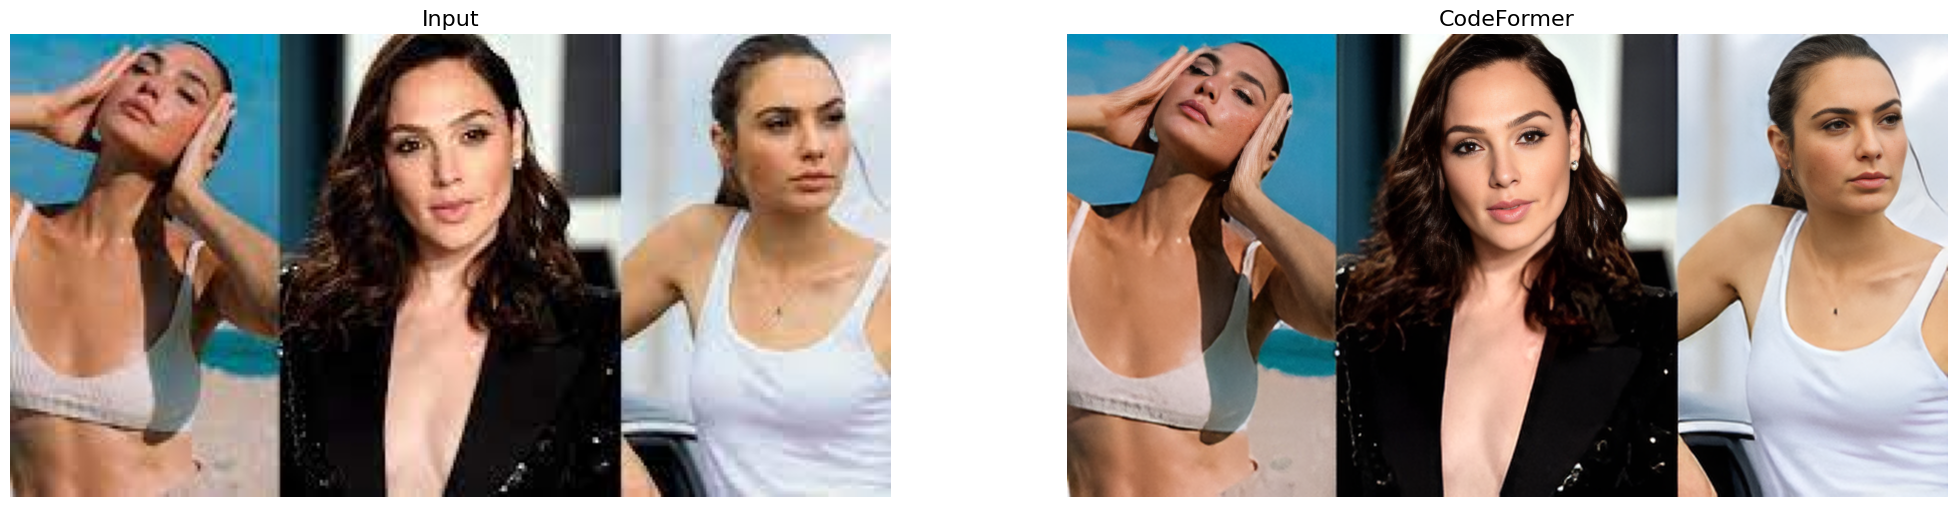

In [ ]:
# Visualizar resultados (preview)
import os
import glob

input_folder = 'inputs/user_upload'
result_folder = f'results/user_upload_{CODEFORMER_FIDELITY}/final_results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  basename = os.path.splitext(os.path.basename(input_path))[0]
  output_path = os.path.join(result_folder, basename+'.png')
  img_output = imread(output_path)
  display(img_input, img_output)

In [ ]:
# Descargar resultados
!ls results
os.system(f'zip -r results.zip results/user_upload_{CODEFORMER_FIDELITY}/final_results')
files.download("results.zip")